 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [53]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [54]:
# Set file path
whale_data = Path("whale_returns.csv")

In [55]:
# Read the individual CSV datasets
whale_df = pd.read_csv(whale_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [56]:
# Reading whale returns
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [57]:
# Count nulls
whale_df.isnull().count()

SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [58]:
# Drop nulls
whale_df.isnull().dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [59]:
# Reading algorithmic returns
# Set file path
algo_data = Path("algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [60]:
# Count nulls
algo_df.isnull().count()

Algo 1    1241
Algo 2    1241
dtype: int64

In [61]:
# Drop nulls
algo_df.isnull().dropna(inplace=True)
algo_df.head()
algo_df["Algo 1"].dtype

dtype('float64')

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [62]:
# Reading S&P TSX 60 Closing Prices
# Set file path
sp_tsx_history_data = Path("sp_tsx_history.csv")

In [63]:
# Check Data Types
sp_tsx_history_df = pd.read_csv(sp_tsx_history_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [64]:
# Fix Data Types
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$", "")
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(",", "")
sp_tsx_history_df["Close"].dtype

sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].astype('float')
sp_tsx_history_df["Close"].dtype

C:\Users\henry\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


dtype('float64')

In [65]:
# Calculate Daily Returns
sp_tsx_history_ret = sp_tsx_history_df.pct_change()

In [66]:
# Drop nulls
sp_tsx_history_ret.isnull().dropna(inplace=True)

In [67]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history_ret.columns = ['S&P TSX 60']
sp_tsx_history_ret

,S&P TSX 60
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [68]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_data = pd.concat([whale_df, algo_df, sp_tsx_history_ret], axis="columns", join="inner")

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Combined Portfolio Returns'}, xlabel='Date'>

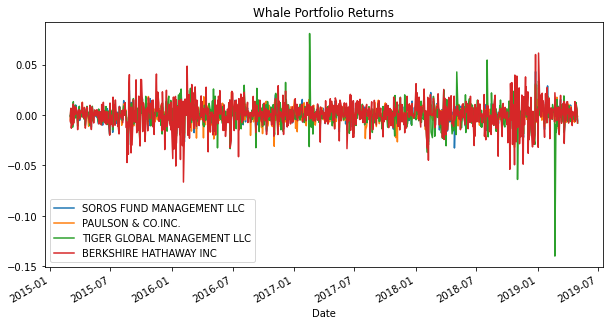

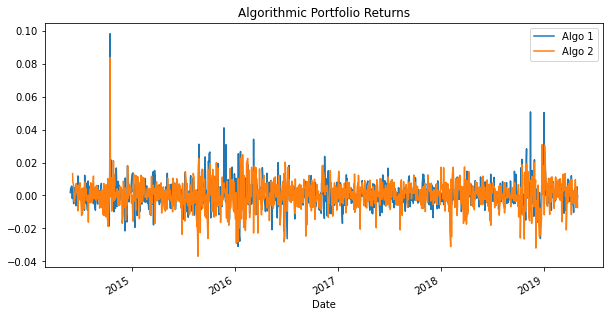

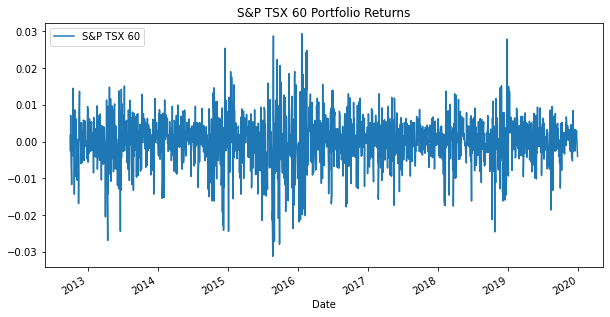

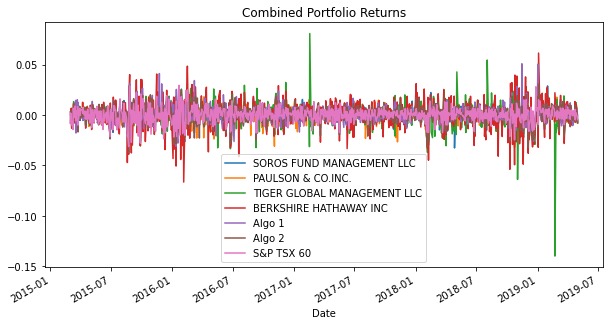

In [69]:
# Plot daily returns of all portfolios
whale_df.plot(figsize=(10,5), title="Whale Portfolio Returns")
algo_df.plot(figsize=(10,5), title="Algorithmic Portfolio Returns")
sp_tsx_history_ret.plot(figsize=(10,5), title="S&P TSX 60 Portfolio Returns")
combined_data.plot(figsize=(10,5), title="Combined Portfolio Returns")


#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Combined Cumulative Returns'}, xlabel='Date'>

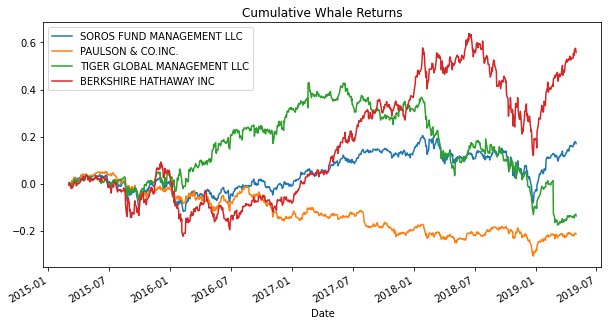

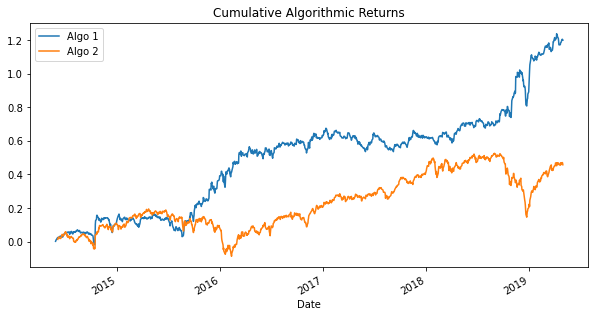

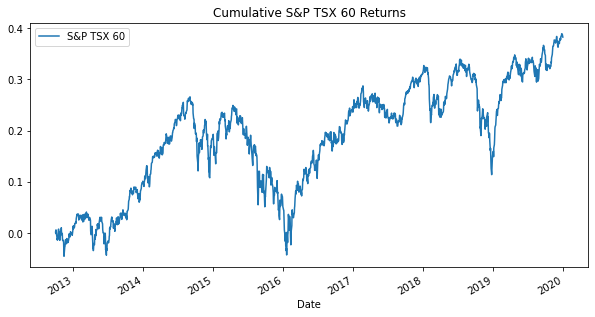

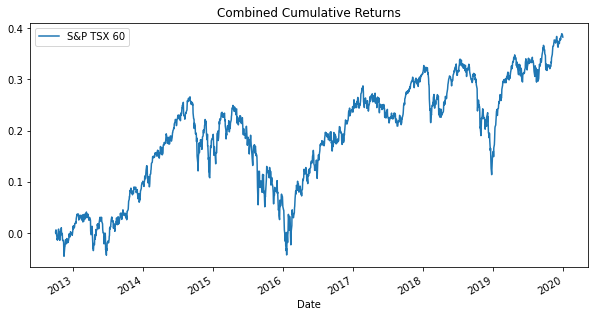

In [70]:
# Calculate cumulative returns of all portfolios
cumulative_returns_whale = (1 + whale_df).cumprod() - 1
cumulative_returns_whale
cumulative_returns_algo = (1 + algo_df).cumprod() - 1
cumulative_returns_algo
cumulative_returns_sp = (1 + sp_tsx_history_ret).cumprod() - 1
cumulative_returns_sp
cumulative_returns_combined = (1 + sp_tsx_history_ret).cumprod() - 1
cumulative_returns_combined
# Plot cumulative returns
cumulative_returns_whale.plot(figsize=(10,5), title="Cumulative Whale Returns")
cumulative_returns_algo.plot(figsize=(10,5), title="Cumulative Algorithmic Returns")
cumulative_returns_sp.plot(figsize=(10,5), title="Cumulative S&P TSX 60 Returns")
cumulative_returns_combined.plot(figsize=(10,5), title="Combined Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Box Plot Combined Portfolio Returns'}>

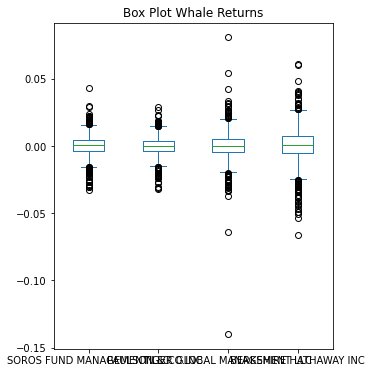

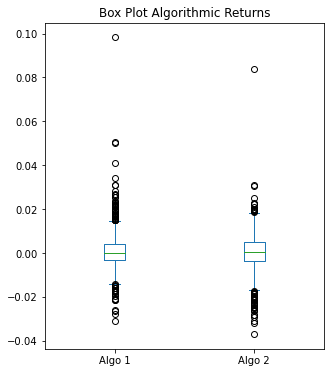

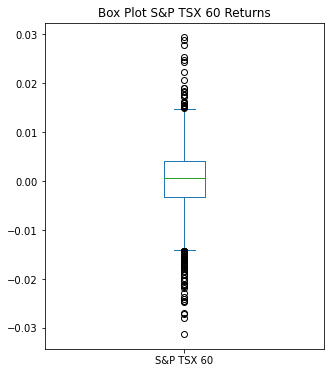

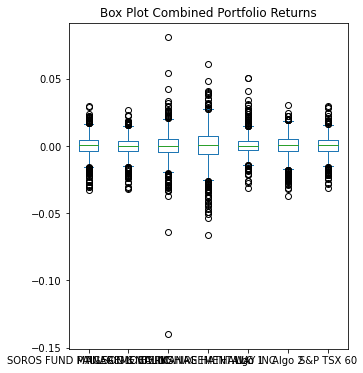

In [71]:
# Box plot to visually show risk
whale_df.plot.box(figsize=(5,6), title="Box Plot Whale Returns")
algo_df.plot.box(figsize=(5,6), title="Box Plot Algorithmic Returns")
sp_tsx_history_ret.plot.box(figsize=(5,6), title="Box Plot S&P TSX 60 Returns")
combined_data.plot.box(figsize=(5,6), title="Box Plot Combined Portfolio Returns")

### Calculate Standard Deviations

In [72]:
# Calculate the daily standard deviations of all portfolios
whale_df_std = whale_df.std()
algo_df_std = algo_df.std()
sp_tsx_history_ret_std = sp_tsx_history_ret.std()
combined_data_std= combined_data.std()


### Determine which portfolios are riskier than the S&P TSX 60

In [73]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_history_ret_std.head()

S&P TSX 60    0.006637
dtype: float64

In [74]:
# Determine which portfolios are riskier than the S&P TSX 60
whale_df_std.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [75]:
# Determine which portfolios are riskier than the S&P TSX 60
algo_df_std.head()

Algo 1    0.007972
Algo 2    0.008466
dtype: float64

### As determined above, the S&P TSX 60 is the least risky of all the portfolios. 

### Calculate the Annualized Standard Deviation

In [76]:
# Calculate the annualized standard deviation (252 trading days)
whale_annualized_std = whale_df_std * np.sqrt(252)
whale_annualized_std.head()
algo_annualized_std = algo_df_std * np.sqrt(252)
algo_annualized_std.head()
sp_annualized_std = sp_tsx_history_ret_std * np.sqrt(252)
sp_annualized_std.head()
combined_annualized_std = combined_data_std * np.sqrt(252)
combined_annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120491
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Combined Portfolio Returns Rolling 21 Day Moving Average'}, xlabel='Date'>

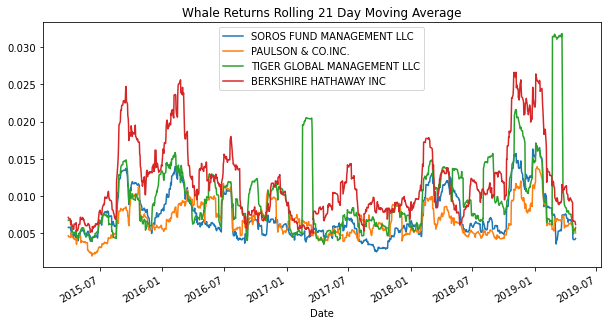

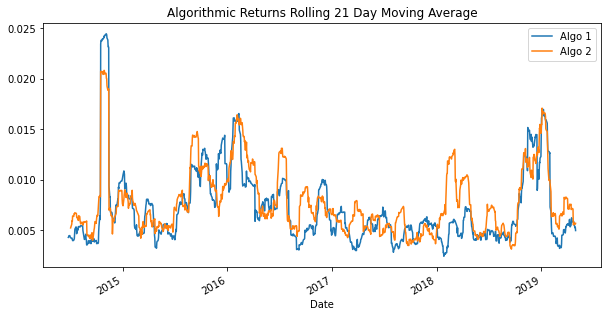

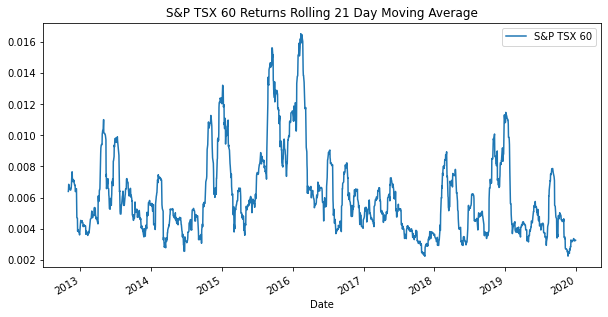

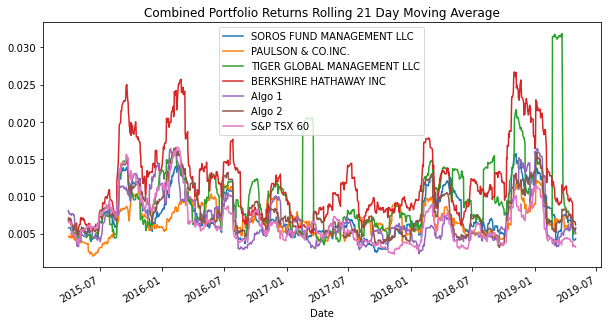

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_df.rolling(window=21).std()
algo_df.rolling(window=21).std()
sp_tsx_history_ret.rolling(window=21).std()
combined_data.rolling(window=21).std()

# Plot the rolling standard deviation
whale_df.rolling(window=21).std().plot(figsize=(10,5), title="Whale Returns Rolling 21 Day Moving Average")
algo_df.rolling(window=21).std().plot(figsize=(10,5), title="Algorithmic Returns Rolling 21 Day Moving Average")
sp_tsx_history_ret.rolling(window=21).std().plot(figsize=(10,5), title="S&P TSX 60 Returns Rolling 21 Day Moving Average")
combined_data.rolling(window=21).std().plot(figsize=(10,5), title="Combined Portfolio Returns Rolling 21 Day Moving Average")


### Calculate and plot the correlation

In [26]:
# Calculate the correlation
price_correlation = combined_data.corr()

# Display de correlation matrix
price_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.284840,0.309759
Algo 2,0.826667,0.674015,0.506689,0.684609,0.284840,1.000000,0.737391
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.309759,0.737391,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [104]:
# Calculate covariance of a single portfolio
combined_algo_df = pd.concat([algo_df, sp_tsx_history_ret], axis="columns", join="inner")
combined_algo_df.head()
combined_algo_df.drop(columns=['Algo 2'], inplace=True)
combined_algo_df.sort_index(inplace=True)
combined_algo_df.head()

,Algo 1,S&P TSX 60
Date,,
2014-05-28,0.001745,-0.003211
2014-05-29,0.003978,-0.001506
2014-05-30,0.004464,0.001043
2014-06-02,0.005692,0.005245
2014-06-03,0.005292,0.003674


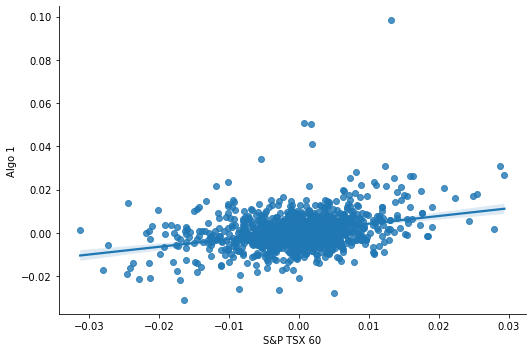

In [105]:
covariance = combined_df['Algo 1'].cov(combined_df['S&P TSX 60'])
covariance
# Calculate variance of S&P TSX
variance = combined_df['S&P TSX 60'].var()
variance
# Computing beta
algo1_beta = covariance / variance
algo1_beta
# Plot beta trend
sns.lmplot(x='S&P TSX 60', y='Algo 1', data=combined_df, aspect=1.5, fit_reg=True)


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

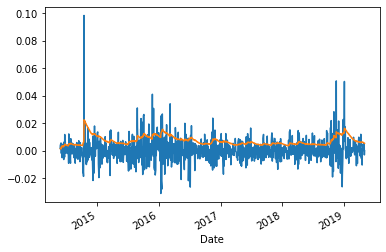

In [106]:
# Use `ewm` to calculate the rolling window
ax = algo_df["Algo 1"].plot()

algo_df['Algo 1'].ewm(com=21).std().plot(ax=ax)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [113]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combined_data.mean() * 252) / (combined_data.std() * np.sqrt(252)))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.473237
Algo 2                         0.402526
S&P TSX 60                     0.199724
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

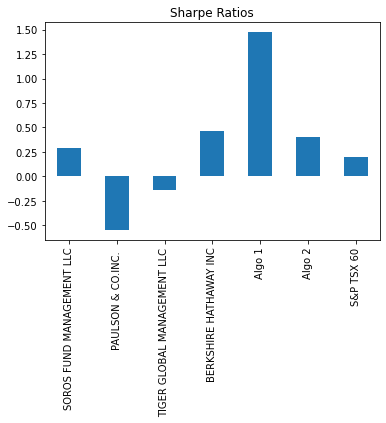

In [114]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

The Algo 1 portfolio outperformed every portfolio using a Sharpe Ratio metric. Berkshire Hathaway INC came second beating Algo 2's portfolio sharpe ratio.

Both Algorithim Portfolios outperformed the S&P TSX 60 considerably. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [120]:
# Reading data from 1st stock
bhp_data = Path("bhp.csv")
bhp_df = pd.read_csv(bhp_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [121]:
# Reading data from 2nd stock
rio_data = Path("rio.csv")
rio_df = pd.read_csv(rio_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [122]:
# Reading data from 3rd stock
ncm_data = Path("ncm.csv")
ncm_df = pd.read_csv(ncm_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [123]:
# Combine all stocks in a single DataFrame
combined_data_cust = pd.concat([bhp_df, rio_df, ncm_df], axis="columns", join="inner")

In [126]:
# Reorganize portfolio data by having a column per symbol
combined_data_cust.columns = ['BHP', 'RIO', 'NCM']

In [128]:
# Calculate daily returns
combined_data_perc = combined_data_cust.pct_change()
# Drop NAs
combined_data_perc.isnull().dropna(inplace=True)
# Display sample data
combined_data_perc.head()

,BHP,RIO,NCM
Date,,,
2021-09-13,NaN,NaN,NaN
2021-09-14,0.006027,0.006037,0.000818
2021-09-15,-0.035226,-0.019032,0.004495
2021-09-16,0.009687,-0.009175,-0.001627
2021-09-17,-0.036654,-0.046976,-0.030970


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [129]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = combined_data_perc.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2021-09-13         NaN
2021-09-14    0.004294
2021-09-15   -0.016588
2021-09-16   -0.000372
2021-09-17   -0.038200
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [147]:
# Join your returns DataFrame to the original returns DataFrame
combined_data_port = pd.concat([combined_data_cust, portfolio_returns], axis="columns", join="inner")
combined_data_port.head()
combined_data_port.drop(columns=[0], inplace=True)
combined_data_port.head()
combined_data_port = combined_data_port.pct_change()
combined_data_port.head()

,BHP,RIO,NCM
Date,,,
2021-09-13,NaN,NaN,NaN
2021-09-14,0.006027,0.006037,0.000818
2021-09-15,-0.035226,-0.019032,0.004495
2021-09-16,0.009687,-0.009175,-0.001627
2021-09-17,-0.036654,-0.046976,-0.030970


In [148]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_data_port.isnull().dropna(inplace=True)
combined_data_port.head()

,BHP,RIO,NCM
Date,,,
2021-09-13,NaN,NaN,NaN
2021-09-14,0.006027,0.006037,0.000818
2021-09-15,-0.035226,-0.019032,0.004495
2021-09-16,0.009687,-0.009175,-0.001627
2021-09-17,-0.036654,-0.046976,-0.030970


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [153]:
# Calculate the annualized `std`
combined_data_port_std = combined_data_port.std()
combined_data_port_std.head()

BHP    0.020569
RIO    0.019752
NCM    0.019606
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

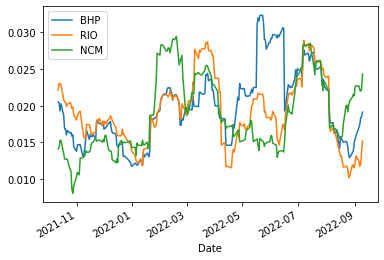

In [157]:
# Calculate rolling standard deviation
combined_data_port.rolling(window=21)
combined_data_port
# Plot rolling standard deviation
combined_data_port.rolling(window=21).std().plot()

### Calculate and plot the correlation

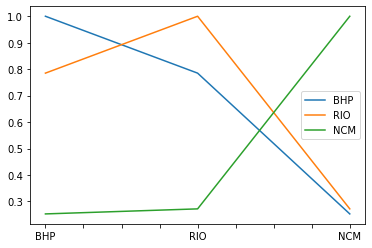

In [162]:
# Calculate and plot the correlation
port_correlation = combined_data_port.corr()
port_correlation = combined_data_port.corr().plot()

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of PORT Returns vs. S&P TSX 60 Returns'}, xlabel='Date'>

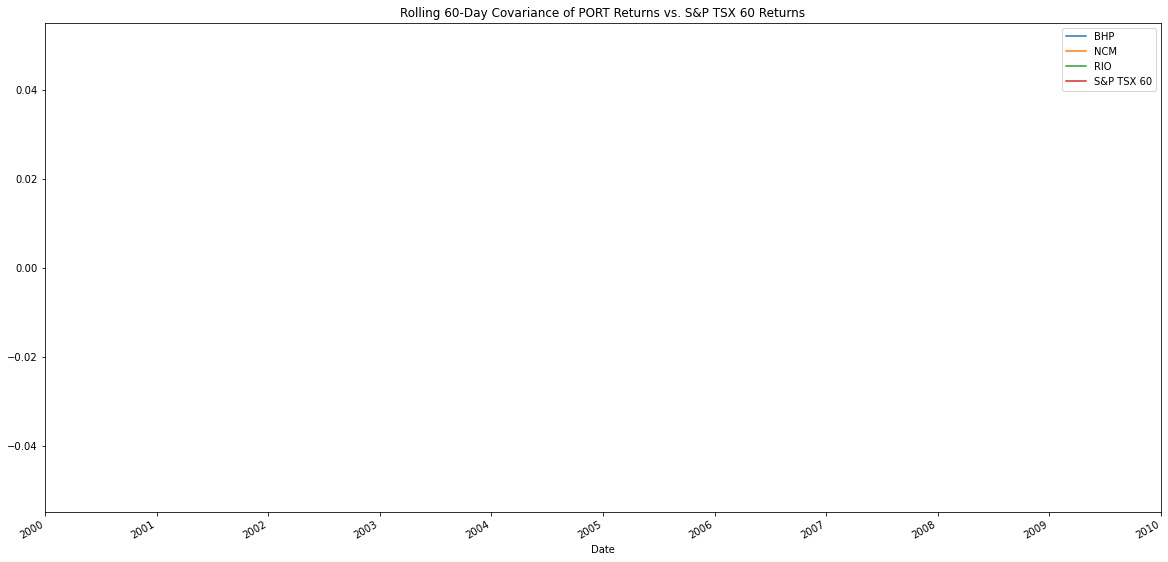

In [165]:
# Calculate and plot Beta
# Calculate 60-day rolling covariance of PORT vs. S&P TSX 60 and plot the data
rolling_covariance_port = combined_data_port.rolling(window=60).cov(sp_tsx_history_ret)
rolling_covariance_port.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of PORT Returns vs. S&P TSX 60 Returns')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [167]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio_port_fin = ((combined_data_port.mean() * 252) / (combined_data_port.std() * np.sqrt(252)))
sharpe_ratio_port_fin

BHP    0.237605
RIO   -0.066506
NCM   -0.831646
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

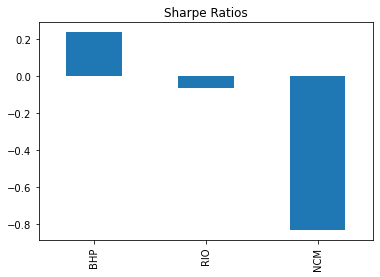

In [168]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_port_fin.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
### Over the specified time period the S&P far exceeded the performance of the three selected stocked. Also the combination of the 3. 